<a href="https://colab.research.google.com/github/amit310/amitkumar/blob/master/Food_Demand_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [0]:
test_file=pd.read_csv("/content/drive/My Drive/test_file.csv")
train_file=pd.read_csv("/content/drive/My Drive/train_file.csv")
meal_file=pd.read_csv("/content/drive/My Drive/meal_info.csv")
fullfilment_file=pd.read_csv("/content/drive/My Drive/fulfilment_center_info.csv")


In [3]:
df=test_file.copy()
df.head()

,"id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured"
0,"1028232,146,55,1885,158.11,159.11,0,0"
1,"1127204,146,55,1993,160.11,159.11,0,0"
2,"1212707,146,55,2539,157.14,159.14,0,0"
3,"1082698,146,55,2631,162.02,162.02,0,0"
4,"1400926,146,55,1248,163.93,163.93,0,0"


In [0]:
df.rename(columns={"id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured":"new"},inplace=True)


In [0]:
df['id']=df.new.str.split(',').str[0]
df['week']=df.new.str.split(',').str[1]
df['center_id']=df.new.str.split(',').str[2]
df['meal_id']=df.new.str.split(',').str[3]
df['checkout_price']=df.new.str.split(',').str[4]
df['base_price']=df.new.str.split(',').str[5]
df['emailer_for_promotion']=df.new.str.split(',').str[6]
df['homepage_featured']=df.new.str.split(',').str[7]
df=df.iloc[:,1:]


In [7]:
df['id']=df['id'].astype('int')
df['week']=df['week'].astype('int')
df['center_id']=df['center_id'].astype('int')
df['meal_id']=df['meal_id'].astype('int')
df['checkout_price']=df['checkout_price'].astype('float')
df['base_price']=df['base_price'].astype('float')

df['emailer_for_promotion']=df['emailer_for_promotion'].astype('int')
df['homepage_featured']=df['homepage_featured'].astype('int')
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [0]:
train_df = pd.merge(train_file,fullfilment_file, on='center_id')
test_df= pd.merge(df,fullfilment_file, on='center_id')


In [0]:
train_df = pd.merge(train_df,meal_file, on='meal_id')
test_df = pd.merge(test_df,meal_file, on='meal_id')

In [127]:
train_df.tail()
#test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental
456547,1443704,145,61,2104,581.03,582.03,0,0,27,473,77,TYPE_A,4.5,Fish,Continental


In [0]:
encoder=LabelEncoder()
encoder2=LabelEncoder()
encoder3=LabelEncoder()

In [65]:
main_data=train_df.copy()
main_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [71]:
main_data['category']=encoder.fit_transform(main_data['category'])
main_data['center_type']=encoder2.fit_transform(main_data['center_type'])
main_data['cuisine']=encoder3.fit_transform(main_data['cuisine'])
main_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,2,2.0,0,3
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,2,2.0,0,3
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,2,2.0,0,3
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,2,2.0,0,3


In [72]:
main_data1= main_data.drop(['id'], axis=1)
correlation = main_data1.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

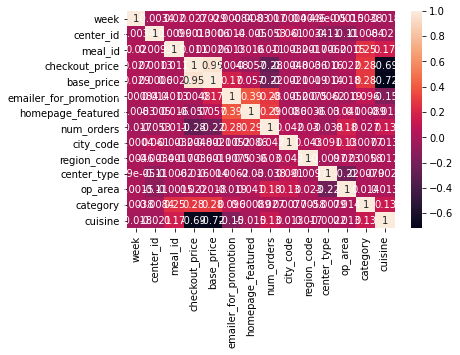

In [103]:
sns.heatmap(correlation,annot=True)
plt.show()

In [0]:
features = columns.drop(['num_orders'])
main_data2 = main_data[features]
X = main_data2.values
y = main_data['num_orders'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [92]:
x_train.shape

(342411, 7)

In [100]:
test_data=test_df.copy()
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [101]:
test_data['category']=encoder.fit_transform(test_data['category'])
test_data['center_type']=encoder2.fit_transform(test_data['center_type'])
test_data['cuisine']=encoder3.fit_transform(test_data['cuisine'])
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,2,2.0,0,3
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,2,2.0,0,3
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,2,2.0,0,3
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,2,2.0,0,3
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,2,2.0,0,3


In [107]:
test_data1=test_data.copy()
test_data1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,2,2.0,0,3
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,2,2.0,0,3
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,2,2.0,0,3
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,2,2.0,0,3
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,2,2.0,0,3


In [112]:
test_data_final=test_data1.drop(columns=['id','center_id','meal_id','week','checkout_price','base_price','center_type'],axis=1)
test_data_final.head()

,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category,cuisine
0,0,0,647,56,2.0,0,3
1,0,0,647,56,2.0,0,3
2,0,0,647,56,2.0,0,3
3,0,0,647,56,2.0,0,3
4,0,0,647,56,2.0,0,3


In [0]:
#Building Models

In [0]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
y_pred = DTR.predict(x_test)

In [95]:
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL

0.6295511919150377

In [96]:
from xgboost import XGBRegressor
XG = XGBRegressor()
XG.fit(x_train, y_train)
y_pred = XG.predict(x_test)
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL


[09:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9499640097480841

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train, y_train)
y_pred = GB.predict(x_test)
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL



0.9431287796406349

In [98]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL


0.629430719057473

In [0]:
y=train_file['num_orders']


In [0]:
from lightgbm import LGBMRegressor,plot_importance
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error,mean_squared_error
from sklearn.model_selection import GridSearchCV


In [85]:
lgb_model=LGBMRegressor(importance_type='gain')
lgbm_params = {
    "n_estimators":[230,260],
    "num_leaves":[41,51],
    'min_child_samples':[40,45,50],
    'random_state':[2019]
  
}
lgb_model.set_params(**lgbm_params) #base model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='gain', learning_rate=0.1, max_depth=-1,
              min_child_samples=[40, 45, 50], min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=[230, 260], n_jobs=-1,
              num_leaves=[41, 51], objective=None, random_state=[2019],
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [0]:
lgb_grid=GridSearchCV(lgb_model,lgbm_params,cv=5,scoring='neg_mean_squared_error',n_jobs=8)

In [0]:
model=lgb_grid.fit(x_train,y_train)

In [30]:
lgb_estimate=model.best_estimator_
lgb_estimate

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='gain', learning_rate=0.1, max_depth=-1,
              min_child_samples=50, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=230, n_jobs=-1, num_leaves=41, objective=None,
              random_state=2019, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [88]:
y_pred=model.predict(x_test)
y_pred

array([  8.12555434, 513.3234066 , 402.01391589, ..., 179.06907358,
       201.15685291, 513.3234066 ])

151401.86081007659

In [90]:
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL


0.6567178303505486

In [0]:
#by comparision the error value of differents models for training data, the lowest error value got from Random Forest Regressio Model
#prediction on test data by Random Forest Regressor

In [113]:
test_data_final.head()

,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category,cuisine
0,0,0,647,56,2.0,0,3
1,0,0,647,56,2.0,0,3
2,0,0,647,56,2.0,0,3
3,0,0,647,56,2.0,0,3
4,0,0,647,56,2.0,0,3


In [114]:
main_data2.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,2.0,3,647,56,0
1,0,0,2.0,3,647,56,0
2,0,0,2.0,3,647,56,0
3,0,0,2.0,3,647,56,0
4,0,0,2.0,3,647,56,0


In [0]:
pred_test_data= RF.predict(test_data_final)
pred_test_data[pred_test_data<0] = 0
submit = pd.DataFrame({
    'id' :test_data['id'],
    'num_orders' : pred_test_data
})

In [122]:
submit.head()

,id,num_orders
0,1028232,731.827408
1,1262649,731.827408
2,1453211,731.827408
3,1262599,731.827408
4,1495848,731.827408


In [0]:
submit.to_csv("submission_RFR.csv", index=False)

In [0]:
test_data.to_csv("test_data",index=True)
train_df.to_csv("train_data",index=True)